$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

----------------------------

# `02` Load Data

In [3]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (housing, test_size=0.2, random_state=1234)

In [6]:
# when using stratify, that's the syntax
# train_set, test_set = train_test_split (housing, test_size=0.2, random_state=1234,stratify=housing["ocean_proximity"])

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17595    -120.07     36.98                12.0       1790.0           379.0   
6073     -118.22     33.86                16.0       8732.0          1489.0   
6251     -120.94     39.32                14.0       3120.0           595.0   
3161     -122.11     37.68                37.0       1976.0           481.0   
1887     -121.34     38.67                35.0        643.0           117.0   

       population  households  median_income  median_house_value  \
17595      1399.0       397.0         2.5388             59600.0   
6073       3944.0      1493.0         5.1948            203500.0   
6251       1569.0       556.0         3.5385            157400.0   
3161       1197.0       465.0         2.5772            170200.0   
1887        331.0       134.0         3.0417            120700.0   

      ocean_proximity  
17595          INLAND  
6073        <1H OCEAN  
6251           INLAND  
3161         NEAR BAY  
1887           INLAND

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17595 to 1318
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


We devided the data now so we have to forget about test_set and just focus on train_set

To see the unique items in each coloumns

In [10]:
categorical = train_set.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {train_set[cat_col].nunique()} uniqueness variable(s)")

ocean_proximity : 5 uniqueness variable(s)


In [11]:
print(train_set['ocean_proximity'].unique())

['INLAND' '<1H OCEAN' 'NEAR BAY' 'NEAR OCEAN' 'ISLAND']


In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

I will upload the photo to understand more about domain knowlodge

In [13]:
from google.colab import files
uploaded = files.upload()

Saving California.png to California.png


In [14]:
from IPython.display import Image
image_path = 'California.png'
Image(image_path)

In [15]:
train_set.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.576297     35.640944           28.629300   2634.395652   
std        2.008301      2.141025           12.622547   2195.367194   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.802500     33.930000           18.000000   1452.750000   
50%     -118.500000     34.260000           29.000000   2128.000000   
75%     -118.010000     37.720000           37.000000   3138.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       537.400086   1422.226562    499.014595       3.869583   
std        422.272540   1119.964665    383.148507       1.896395   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    786.000000    280.000000       2.562500   
50%        435.000000   1166.000000    410.000000       3.539400   
75%        646.000000   1720.000000    603.000000       4.748350   
max       6445.000000  28566.000000   6082.000000      15.000100   

       median_house_value  
count        16512.000000  
mean        207185.675327  
std         115624.027082  
min          14999.000000  
25%         119800.000000  
50%         180400.000000  
75%         265600.000000  
max         500001.000000

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

Look at every feature in deepth to discover anything

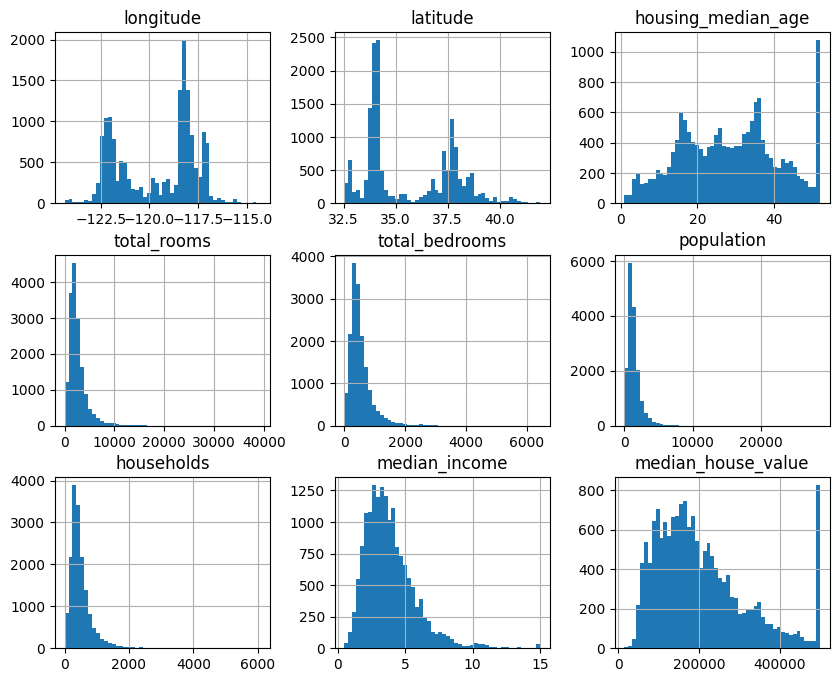

In [16]:
train_set.hist(bins=50, figsize=(10,8))
plt.show()

We noticed that there are a problem in median_house_value columns at 500000

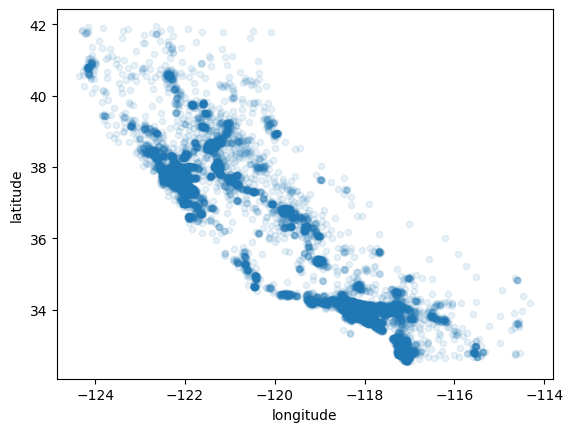

In [17]:
# To show the regions with high intenisty
# Make the alpha with 0.1 to make a good scatter
train_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.show()

In [18]:
# To see the last plot with median_house_value in colors
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=train_set["population"]/100, label="population", figsize=(7,5),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

To see the correlation between columns with heatmap

<ipython-input-19-4d0d7bc06a18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(), annot=True)


<Axes: >

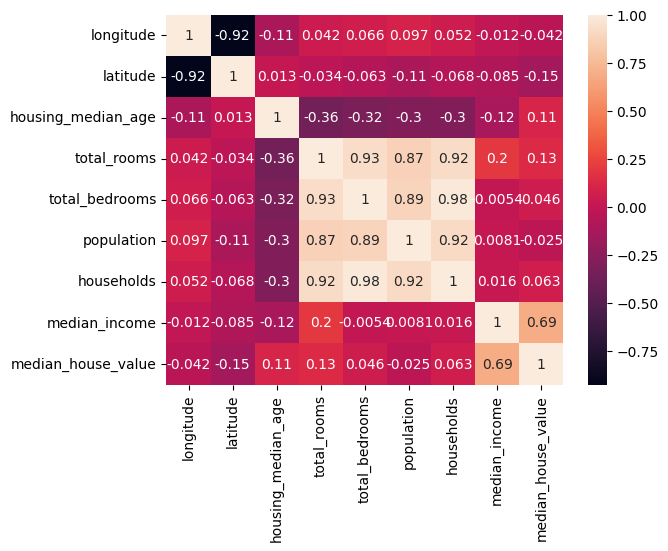

In [19]:
sns.heatmap(train_set.corr(), annot=True)

Three ways to see the correlation between columns

In [20]:
sns.pairplot(train_set[["median_house_value", "median_income", "total_rooms","housing_median_age"]])

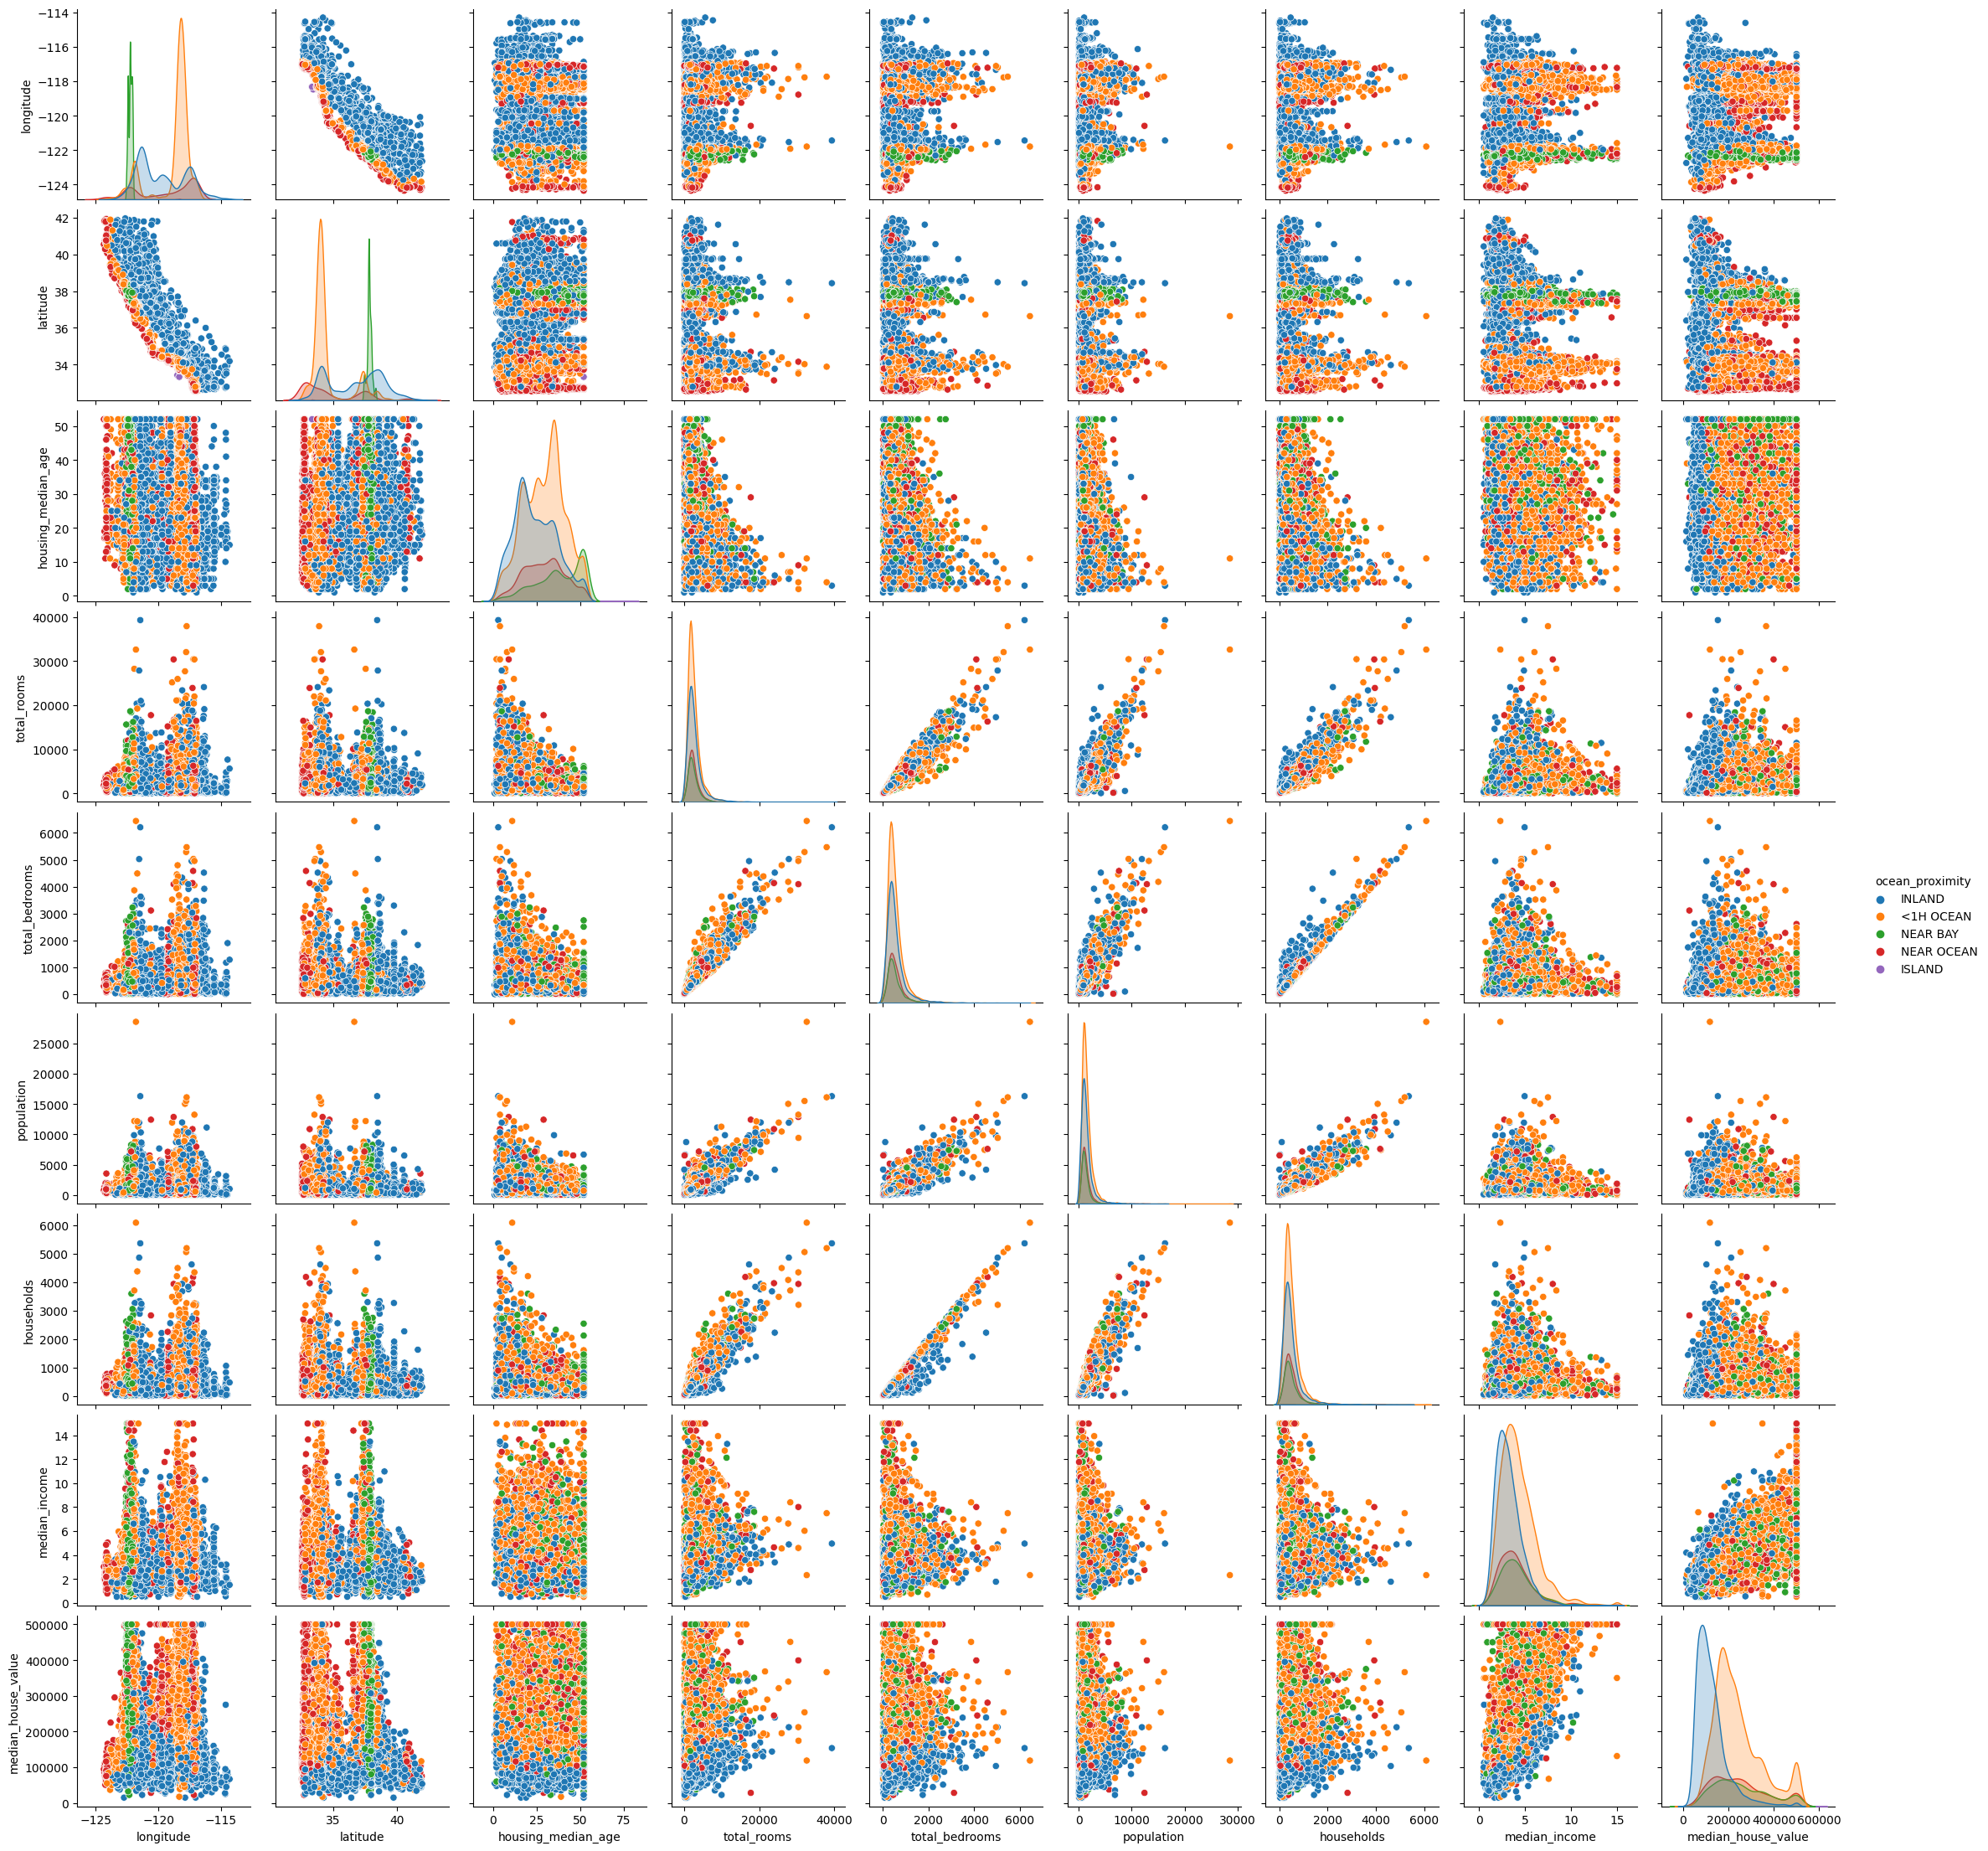

In [21]:
sns.pairplot(train_set, hue="ocean_proximity")

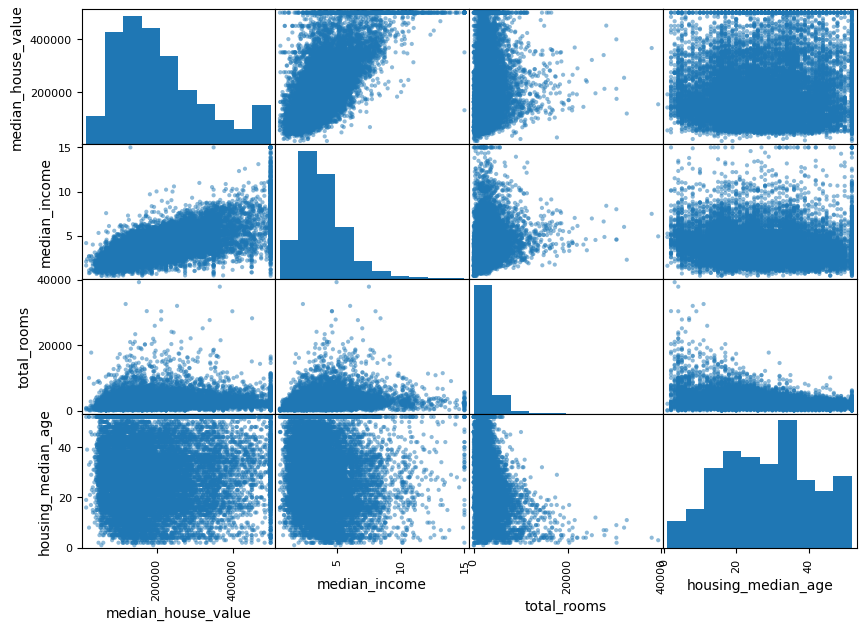

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train_set[attributes], figsize=(10, 7))
plt.show()

from last two plots we noticed that there are a problem at 500000

In [22]:
# More Exploration with Attribute Combinations
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"]=train_set["population"]/train_set["households"]

In [23]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-23-4ce289483e12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


median_house_value          1.000000
median_income               0.689988
rooms_per_household         0.173935
total_rooms                 0.131754
housing_median_age          0.108490
households                  0.062802
total_bedrooms              0.045670
population                 -0.025377
population_per_household   -0.032719
longitude                  -0.041624
latitude                   -0.149469
bedrooms_per_room          -0.253845
Name: median_house_value, dtype: float64

In [24]:
train_set.plot(kind="scatter", x="rooms_per_household", y="median_house_value",alpha=0.1)
plt.show()

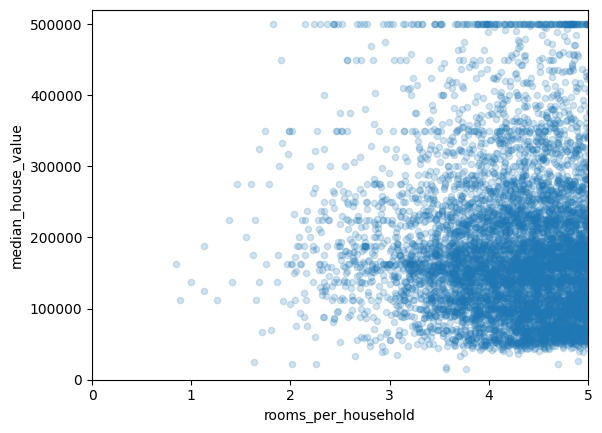

In [25]:
train_set.plot(kind="scatter", x="rooms_per_household", y="median_house_value",alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [26]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17595    -120.07     36.98                12.0       1790.0           379.0   
6073     -118.22     33.86                16.0       8732.0          1489.0   
6251     -120.94     39.32                14.0       3120.0           595.0   
3161     -122.11     37.68                37.0       1976.0           481.0   
1887     -121.34     38.67                35.0        643.0           117.0   

       population  households  median_income  median_house_value  \
17595      1399.0       397.0         2.5388             59600.0   
6073       3944.0      1493.0         5.1948            203500.0   
6251       1569.0       556.0         3.5385            157400.0   
3161       1197.0       465.0         2.5772            170200.0   
1887        331.0       134.0         3.0417            120700.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
17595          INLAND             4.508816           0.211732   
6073        <1H OCEAN             5.848627           0.170522   
6251           INLAND             5.611511           0.190705   
3161         NEAR BAY             4.249462           0.243421   
1887           INLAND             4.798507           0.181960   

       population_per_household  
17595                  3.523929  
6073                   2.641661  
6251                   2.821942  
3161                   2.574194  
1887                   2.470149

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [27]:
# To show some of the missing values row
incomplete_rows = train_set[train_set.isnull().any(axis=1)]  # if you want to show only first 5 rows add .head() in this line
incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
495      -114.59     34.83                41.0        812.0             NaN   
9947     -117.98     33.68                24.0       4177.0             NaN   
4919     -121.13     38.87                48.0       1127.0             NaN   
5971     -118.30     34.07                18.0       3759.0             NaN   
19614    -118.20     33.92                45.0       1283.0             NaN   
...          ...       ...                 ...          ...             ...   
9456     -122.24     37.75                45.0        891.0             NaN   
15349    -117.91     33.76                20.0       4413.0             NaN   
5630     -118.37     34.07                50.0       2519.0             NaN   
13350    -121.97     37.35                30.0       1955.0             NaN   
15123    -119.15     36.29                18.0       1435.0             NaN   

       population  households  median_income  median_house_value  \
495         375.0       158.0         1.7083             48500.0   
9947       1704.0       606.0         6.2473            281900.0   
4919        530.0       186.0         3.0917            128100.0   
5971       3296.0      1462.0         2.2708            175000.0   
19614      1025.0       248.0         3.2798            141200.0   
...           ...         ...            ...                 ...   
9456        384.0       146.0         4.9489            247100.0   
15349      4818.0      1063.0         2.8594            215100.0   
5630       1117.0       516.0         4.3667            405600.0   
13350       999.0       386.0         4.6328            287100.0   
15123       657.0       254.0         2.4281             72500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
495            INLAND             5.139241                NaN   
9947        <1H OCEAN             6.892739                NaN   
4919           INLAND             6.059140                NaN   
5971        <1H OCEAN             2.571135                NaN   
19614       <1H OCEAN             5.173387                NaN   
...               ...                  ...                ...   
9456         NEAR BAY             6.102740                NaN   
15349       <1H OCEAN             4.151458                NaN   
5630        <1H OCEAN             4.881783                NaN   
13350       <1H OCEAN             5.064767                NaN   
15123          INLAND             5.649606                NaN   

       population_per_household  
495                    2.373418  
9947                   2.811881  
4919                   2.849462  
5971                   2.254446  
19614                  4.133065  
...                         ...  
9456                   2.630137  
15349                  4.532455  
5630                   2.164729  
13350                  2.588083  
15123                  2.586614  

[158 rows x 13 columns]

In [28]:
# To fill the missing values in "total_bedrooms" column
median = train_set["total_bedrooms"].median()
train_set["total_bedrooms"].fillna(median, inplace=True)

In [29]:
# There are another way more easy and orgnaized to fill the missing value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [30]:
incomplete_rows = train_set[train_set.isnull().any(axis=1)]
incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
495      -114.59     34.83                41.0        812.0           435.0   
9947     -117.98     33.68                24.0       4177.0           435.0   
4919     -121.13     38.87                48.0       1127.0           435.0   
5971     -118.30     34.07                18.0       3759.0           435.0   
19614    -118.20     33.92                45.0       1283.0           435.0   
...          ...       ...                 ...          ...             ...   
9456     -122.24     37.75                45.0        891.0           435.0   
15349    -117.91     33.76                20.0       4413.0           435.0   
5630     -118.37     34.07                50.0       2519.0           435.0   
13350    -121.97     37.35                30.0       1955.0           435.0   
15123    -119.15     36.29                18.0       1435.0           435.0   

       population  households  median_income  median_house_value  \
495         375.0       158.0         1.7083             48500.0   
9947       1704.0       606.0         6.2473            281900.0   
4919        530.0       186.0         3.0917            128100.0   
5971       3296.0      1462.0         2.2708            175000.0   
19614      1025.0       248.0         3.2798            141200.0   
...           ...         ...            ...                 ...   
9456        384.0       146.0         4.9489            247100.0   
15349      4818.0      1063.0         2.8594            215100.0   
5630       1117.0       516.0         4.3667            405600.0   
13350       999.0       386.0         4.6328            287100.0   
15123       657.0       254.0         2.4281             72500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
495            INLAND             5.139241                NaN   
9947        <1H OCEAN             6.892739                NaN   
4919           INLAND             6.059140                NaN   
5971        <1H OCEAN             2.571135                NaN   
19614       <1H OCEAN             5.173387                NaN   
...               ...                  ...                ...   
9456         NEAR BAY             6.102740                NaN   
15349       <1H OCEAN             4.151458                NaN   
5630        <1H OCEAN             4.881783                NaN   
13350       <1H OCEAN             5.064767                NaN   
15123          INLAND             5.649606                NaN   

       population_per_household  
495                    2.373418  
9947                   2.811881  
4919                   2.849462  
5971                   2.254446  
19614                  4.133065  
...                         ...  
9456                   2.630137  
15349                  4.532455  
5630                   2.164729  
13350                  2.588083  
15123                  2.586614  

[158 rows x 13 columns]

Devide the data to numerical and categorical because it is different in handling with



In [31]:
# this is the numerical columns
housing_num = train_set.drop("ocean_proximity", axis=1)
# we can use this also :
# housing_num = train_set.select_dtypes(include=[np.number])

In [32]:
# Here the imputer stored the median value for every columns
from sklearn.impute import SimpleImputer
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
# To show the median for every column
imputer.statistics_ # housing_num.median().values
# The "_" because it learned it before

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.12800000e+03,
        4.35000000e+02,  1.16600000e+03,  4.10000000e+02,  3.53940000e+00,
        1.80400000e+05,  5.23306595e+00,  2.03242843e-01,  2.81886792e+00])

In [34]:
# To show our new unmissing values in their rows
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=train_set.index)

In [35]:
housing_tr.loc[incomplete_rows.index.values]
# The indices of the missing values row were stored in dataframe so it just calls them to see

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
495      -114.59     34.83                41.0        812.0           435.0   
9947     -117.98     33.68                24.0       4177.0           435.0   
4919     -121.13     38.87                48.0       1127.0           435.0   
5971     -118.30     34.07                18.0       3759.0           435.0   
19614    -118.20     33.92                45.0       1283.0           435.0   
...          ...       ...                 ...          ...             ...   
9456     -122.24     37.75                45.0        891.0           435.0   
15349    -117.91     33.76                20.0       4413.0           435.0   
5630     -118.37     34.07                50.0       2519.0           435.0   
13350    -121.97     37.35                30.0       1955.0           435.0   
15123    -119.15     36.29                18.0       1435.0           435.0   

       population  households  median_income  median_house_value  \
495         375.0       158.0         1.7083             48500.0   
9947       1704.0       606.0         6.2473            281900.0   
4919        530.0       186.0         3.0917            128100.0   
5971       3296.0      1462.0         2.2708            175000.0   
19614      1025.0       248.0         3.2798            141200.0   
...           ...         ...            ...                 ...   
9456        384.0       146.0         4.9489            247100.0   
15349      4818.0      1063.0         2.8594            215100.0   
5630       1117.0       516.0         4.3667            405600.0   
13350       999.0       386.0         4.6328            287100.0   
15123       657.0       254.0         2.4281             72500.0   

       rooms_per_household  bedrooms_per_room  population_per_household  
495               5.139241           0.203243                  2.373418  
9947              6.892739           0.203243                  2.811881  
4919              6.059140           0.203243                  2.849462  
5971              2.571135           0.203243                  2.254446  
19614             5.173387           0.203243                  4.133065  
...                    ...                ...                       ...  
9456              6.102740           0.203243                  2.630137  
15349             4.151458           0.203243                  4.532455  
5630              4.881783           0.203243                  2.164729  
13350             5.064767           0.203243                  2.588083  
15123             5.649606           0.203243                  2.586614  

[158 rows x 12 columns]

Now we see the new value in "total_bedrooms" column : 435

Now we want to handle with categorical attributies

In [36]:
# All Categorical data
housing_cat = train_set[["ocean_proximity"]]
housing_cat

ocean_proximity
17595          INLAND
6073        <1H OCEAN
6251           INLAND
3161         NEAR BAY
1887           INLAND
...               ...
8222           INLAND
9449           INLAND
8471        <1H OCEAN
17048       <1H OCEAN
1318           INLAND

[16512 rows x 1 columns]

In [37]:
# we want to encode the ocean_proximity columns so we have two ways: OrdinalEncoder or OneHotEncoder
# If you use OrdinalEncoder, you should order your categories with degrees from 0 to up depends on the importance like this:
"""
from sklearn.preprocessing import OrdinalEncoder
housing_cat_encoded = OrdinalEncoder(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']).fit_transform(housing_cat)
"""
# '<1H OCEAN' : 0, 'INLAND' : 1, 'NEAR BAY' :2, 'NEAR OCEAN' :3, 'ISLAND' :4

"\nfrom sklearn.preprocessing import OrdinalEncoder\nhousing_cat_encoded = OrdinalEncoder(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']).fit_transform(housing_cat)\n"

In [38]:
# Using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [39]:
onh = OneHotEncoder(sparse=False)
housing_cat_1hot = onh.fit_transform(housing_cat)
housing_cat_1hot
# You can make the output directly array py putting "sparse=False" like this:
# housing_cat_1hot = OneHotEncoder(sparse=False).fit_transform(housing_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

In [40]:
print(housing_cat_1hot)

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [41]:
onh.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
feature_labels = onh.categories_

In [43]:
feature_labels = np.array(feature_labels).ravel()

In [44]:
print(feature_labels)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [45]:
pd.DataFrame(housing_cat_1hot, columns = feature_labels)

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0            0.0     1.0     0.0       0.0         0.0
1            1.0     0.0     0.0       0.0         0.0
2            0.0     1.0     0.0       0.0         0.0
3            0.0     0.0     0.0       1.0         0.0
4            0.0     1.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
16507        0.0     1.0     0.0       0.0         0.0
16508        0.0     1.0     0.0       0.0         0.0
16509        1.0     0.0     0.0       0.0         0.0
16510        1.0     0.0     0.0       0.0         0.0
16511        0.0     1.0     0.0       0.0         0.0

[16512 rows x 5 columns]

In [46]:
features = pd.DataFrame(housing_cat_1hot, columns = feature_labels)
print(features)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0            0.0     1.0     0.0       0.0         0.0
1            1.0     0.0     0.0       0.0         0.0
2            0.0     1.0     0.0       0.0         0.0
3            0.0     0.0     0.0       1.0         0.0
4            0.0     1.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
16507        0.0     1.0     0.0       0.0         0.0
16508        0.0     1.0     0.0       0.0         0.0
16509        1.0     0.0     0.0       0.0         0.0
16510        1.0     0.0     0.0       0.0         0.0
16511        0.0     1.0     0.0       0.0         0.0

[16512 rows x 5 columns]


In [47]:
features

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0            0.0     1.0     0.0       0.0         0.0
1            1.0     0.0     0.0       0.0         0.0
2            0.0     1.0     0.0       0.0         0.0
3            0.0     0.0     0.0       1.0         0.0
4            0.0     1.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
16507        0.0     1.0     0.0       0.0         0.0
16508        0.0     1.0     0.0       0.0         0.0
16509        1.0     0.0     0.0       0.0         0.0
16510        1.0     0.0     0.0       0.0         0.0
16511        0.0     1.0     0.0       0.0         0.0

[16512 rows x 5 columns]

In [48]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17595    -120.07     36.98                12.0       1790.0           379.0   
6073     -118.22     33.86                16.0       8732.0          1489.0   
6251     -120.94     39.32                14.0       3120.0           595.0   
3161     -122.11     37.68                37.0       1976.0           481.0   
1887     -121.34     38.67                35.0        643.0           117.0   
...          ...       ...                 ...          ...             ...   
8222     -120.04     36.79                48.0       1341.0           239.0   
9449     -118.18     36.63                23.0       2311.0           487.0   
8471     -119.71     34.43                47.0       1572.0           417.0   
17048    -117.92     33.62                35.0       1821.0           335.0   
1318     -118.19     34.65                33.0       1781.0           326.0   

       population  households  median_income  median_house_value  \
17595      1399.0       397.0         2.5388             59600.0   
6073       3944.0      1493.0         5.1948            203500.0   
6251       1569.0       556.0         3.5385            157400.0   
3161       1197.0       465.0         2.5772            170200.0   
1887        331.0       134.0         3.0417            120700.0   
...           ...         ...            ...                 ...   
8222        671.0       208.0         2.7917             82800.0   
9449       1019.0       384.0         2.2574            104700.0   
8471        790.0       384.0         2.6429            279200.0   
17048       727.0       316.0         6.5842            458500.0   
1318        913.0       314.0         3.9963            126800.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
17595          INLAND             4.508816           0.211732   
6073        <1H OCEAN             5.848627           0.170522   
6251           INLAND             5.611511           0.190705   
3161         NEAR BAY             4.249462           0.243421   
1887           INLAND             4.798507           0.181960   
...               ...                  ...                ...   
8222           INLAND             6.447115           0.178225   
9449           INLAND             6.018229           0.210731   
8471        <1H OCEAN             4.093750           0.265267   
17048       <1H OCEAN             5.762658           0.183965   
1318           INLAND             5.671975           0.183043   

       population_per_household  
17595                  3.523929  
6073                   2.641661  
6251                   2.821942  
3161                   2.574194  
1887                   2.470149  
...                         ...  
8222                   3.225962  
9449                   2.653646  
8471                   2.057292  
17048                  2.300633  
1318                   2.907643  

[16512 rows x 13 columns]

In [49]:
train_set8 = train_set
train_set8

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17595    -120.07     36.98                12.0       1790.0           379.0   
6073     -118.22     33.86                16.0       8732.0          1489.0   
6251     -120.94     39.32                14.0       3120.0           595.0   
3161     -122.11     37.68                37.0       1976.0           481.0   
1887     -121.34     38.67                35.0        643.0           117.0   
...          ...       ...                 ...          ...             ...   
8222     -120.04     36.79                48.0       1341.0           239.0   
9449     -118.18     36.63                23.0       2311.0           487.0   
8471     -119.71     34.43                47.0       1572.0           417.0   
17048    -117.92     33.62                35.0       1821.0           335.0   
1318     -118.19     34.65                33.0       1781.0           326.0   

       population  households  median_income  median_house_value  \
17595      1399.0       397.0         2.5388             59600.0   
6073       3944.0      1493.0         5.1948            203500.0   
6251       1569.0       556.0         3.5385            157400.0   
3161       1197.0       465.0         2.5772            170200.0   
1887        331.0       134.0         3.0417            120700.0   
...           ...         ...            ...                 ...   
8222        671.0       208.0         2.7917             82800.0   
9449       1019.0       384.0         2.2574            104700.0   
8471        790.0       384.0         2.6429            279200.0   
17048       727.0       316.0         6.5842            458500.0   
1318        913.0       314.0         3.9963            126800.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
17595          INLAND             4.508816           0.211732   
6073        <1H OCEAN             5.848627           0.170522   
6251           INLAND             5.611511           0.190705   
3161         NEAR BAY             4.249462           0.243421   
1887           INLAND             4.798507           0.181960   
...               ...                  ...                ...   
8222           INLAND             6.447115           0.178225   
9449           INLAND             6.018229           0.210731   
8471        <1H OCEAN             4.093750           0.265267   
17048       <1H OCEAN             5.762658           0.183965   
1318           INLAND             5.671975           0.183043   

       population_per_household  
17595                  3.523929  
6073                   2.641661  
6251                   2.821942  
3161                   2.574194  
1887                   2.470149  
...                         ...  
8222                   3.225962  
9449                   2.653646  
8471                   2.057292  
17048                  2.300633  
1318                   2.907643  

[16512 rows x 13 columns]

In [50]:
Feature1 = features
train_set8.reset_index(drop = True, inplace =True)
Feature1.reset_index(drop = True, inplace =True )

In [51]:
concatenated_df = pd.concat([train_set8, Feature1], axis=1)
concatenated_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -120.07     36.98                12.0       1790.0           379.0   
1        -118.22     33.86                16.0       8732.0          1489.0   
2        -120.94     39.32                14.0       3120.0           595.0   
3        -122.11     37.68                37.0       1976.0           481.0   
4        -121.34     38.67                35.0        643.0           117.0   
...          ...       ...                 ...          ...             ...   
16507    -120.04     36.79                48.0       1341.0           239.0   
16508    -118.18     36.63                23.0       2311.0           487.0   
16509    -119.71     34.43                47.0       1572.0           417.0   
16510    -117.92     33.62                35.0       1821.0           335.0   
16511    -118.19     34.65                33.0       1781.0           326.0   

       population  households  median_income  median_house_value  \
0          1399.0       397.0         2.5388             59600.0   
1          3944.0      1493.0         5.1948            203500.0   
2          1569.0       556.0         3.5385            157400.0   
3          1197.0       465.0         2.5772            170200.0   
4           331.0       134.0         3.0417            120700.0   
...           ...         ...            ...                 ...   
16507       671.0       208.0         2.7917             82800.0   
16508      1019.0       384.0         2.2574            104700.0   
16509       790.0       384.0         2.6429            279200.0   
16510       727.0       316.0         6.5842            458500.0   
16511       913.0       314.0         3.9963            126800.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
0              INLAND             4.508816           0.211732   
1           <1H OCEAN             5.848627           0.170522   
2              INLAND             5.611511           0.190705   
3            NEAR BAY             4.249462           0.243421   
4              INLAND             4.798507           0.181960   
...               ...                  ...                ...   
16507          INLAND             6.447115           0.178225   
16508          INLAND             6.018229           0.210731   
16509       <1H OCEAN             4.093750           0.265267   
16510       <1H OCEAN             5.762658           0.183965   
16511          INLAND             5.671975           0.183043   

       population_per_household  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0                      3.523929        0.0     1.0     0.0       0.0   
1                      2.641661        1.0     0.0     0.0       0.0   
2                      2.821942        0.0     1.0     0.0       0.0   
3                      2.574194        0.0     0.0     0.0       1.0   
4                      2.470149        0.0     1.0     0.0       0.0   
...                         ...        ...     ...     ...       ...   
16507                  3.225962        0.0     1.0     0.0       0.0   
16508                  2.653646        0.0     1.0     0.0       0.0   
16509                  2.057292        1.0     0.0     0.0       0.0   
16510                  2.300633        1.0     0.0     0.0       0.0   
16511                  2.907643        0.0     1.0     0.0       0.0   

       NEAR OCEAN  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
16507         0.0  
16508         0.0  
16509         0.0  
16510         0.0  
16511         0.0  

[16512 rows x 18 columns]

In [52]:
df = concatenated_df.drop('ocean_proximity', axis=1)

In [53]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -120.07     36.98                12.0       1790.0           379.0   
1        -118.22     33.86                16.0       8732.0          1489.0   
2        -120.94     39.32                14.0       3120.0           595.0   
3        -122.11     37.68                37.0       1976.0           481.0   
4        -121.34     38.67                35.0        643.0           117.0   
...          ...       ...                 ...          ...             ...   
16507    -120.04     36.79                48.0       1341.0           239.0   
16508    -118.18     36.63                23.0       2311.0           487.0   
16509    -119.71     34.43                47.0       1572.0           417.0   
16510    -117.92     33.62                35.0       1821.0           335.0   
16511    -118.19     34.65                33.0       1781.0           326.0   

       population  households  median_income  median_house_value  \
0          1399.0       397.0         2.5388             59600.0   
1          3944.0      1493.0         5.1948            203500.0   
2          1569.0       556.0         3.5385            157400.0   
3          1197.0       465.0         2.5772            170200.0   
4           331.0       134.0         3.0417            120700.0   
...           ...         ...            ...                 ...   
16507       671.0       208.0         2.7917             82800.0   
16508      1019.0       384.0         2.2574            104700.0   
16509       790.0       384.0         2.6429            279200.0   
16510       727.0       316.0         6.5842            458500.0   
16511       913.0       314.0         3.9963            126800.0   

       rooms_per_household  bedrooms_per_room  population_per_household  \
0                 4.508816           0.211732                  3.523929   
1                 5.848627           0.170522                  2.641661   
2                 5.611511           0.190705                  2.821942   
3                 4.249462           0.243421                  2.574194   
4                 4.798507           0.181960                  2.470149   
...                    ...                ...                       ...   
16507             6.447115           0.178225                  3.225962   
16508             6.018229           0.210731                  2.653646   
16509             4.093750           0.265267                  2.057292   
16510             5.762658           0.183965                  2.300633   
16511             5.671975           0.183043                  2.907643   

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0            0.0     1.0     0.0       0.0         0.0  
1            1.0     0.0     0.0       0.0         0.0  
2            0.0     1.0     0.0       0.0         0.0  
3            0.0     0.0     0.0       1.0         0.0  
4            0.0     1.0     0.0       0.0         0.0  
...          ...     ...     ...       ...         ...  
16507        0.0     1.0     0.0       0.0         0.0  
16508        0.0     1.0     0.0       0.0         0.0  
16509        1.0     0.0     0.0       0.0         0.0  
16510        1.0     0.0     0.0       0.0         0.0  
16511        0.0     1.0     0.0       0.0         0.0  

[16512 rows x 17 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16354 non-null  float64
 11  population_per_household  16512 non-null  float64
 12  <1H OCEAN                 16512 non-null  float64
 13  INLAND                    16512 non-null  float64
 14  ISLAND

Fill The missing values in "bedrooms_per_room" column with the median value

In [55]:
median = df["bedrooms_per_room"].median()
df["bedrooms_per_room"].fillna(median, inplace=True)

In [56]:
imputer_bedrooms = SimpleImputer(strategy="median")
incomplete_rows_bedrooms = df[df.isnull().any(axis=1)]
incomplete_rows_bedrooms

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, rooms_per_household, bedrooms_per_room, population_per_household, <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN]
Index: []

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
 12  <1H OCEAN                 16512 non-null  float64
 13  INLAND                    16512 non-null  float64
 14  ISLAND

I will  drop the target coloumn "median_house_value" from the train_set to use it after in the model part

In [58]:
final_df_train = df.drop('median_house_value', axis=1)
final_df_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.07     36.98                12.0       1790.0           379.0   
1    -118.22     33.86                16.0       8732.0          1489.0   
2    -120.94     39.32                14.0       3120.0           595.0   
3    -122.11     37.68                37.0       1976.0           481.0   
4    -121.34     38.67                35.0        643.0           117.0   

   population  households  median_income  rooms_per_household  \
0      1399.0       397.0         2.5388             4.508816   
1      3944.0      1493.0         5.1948             5.848627   
2      1569.0       556.0         3.5385             5.611511   
3      1197.0       465.0         2.5772             4.249462   
4       331.0       134.0         3.0417             4.798507   

   bedrooms_per_room  population_per_household  <1H OCEAN  INLAND  ISLAND  \
0           0.211732                  3.523929        0.0     1.0     0.0   
1           0.170522                  2.641661        1.0     0.0     0.0   
2           0.190705                  2.821942        0.0     1.0     0.0   
3           0.243421                  2.574194        0.0     0.0     0.0   
4           0.181960                  2.470149        0.0     1.0     0.0   

   NEAR BAY  NEAR OCEAN  
0       0.0         0.0  
1       0.0         0.0  
2       0.0         0.0  
3       1.0         0.0  
4       0.0         0.0

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [59]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15712    -117.27     33.68                 8.0      26322.0          4072.0   
4119     -117.20     33.24                12.0       4992.0             NaN   
15725    -120.87     38.83                12.0       2180.0           423.0   
14616    -119.71     36.81                19.0       1648.0           368.0   
13238    -122.46     37.71                39.0       2076.0           482.0   

       population  households  median_income  median_house_value  \
15712      9360.0      3361.0         5.3238            228900.0   
4119       2106.0       801.0         6.2079            307300.0   
15725      1070.0       377.0         2.8562            128200.0   
14616       557.0       354.0         1.7969             72800.0   
13238      1738.0       445.0         3.1958            232100.0   

      ocean_proximity  
15712       <1H OCEAN  
4119        <1H OCEAN  
15725          INLAND  
14616          INLAND  
13238      NEAR OCEAN

In [60]:
# Add Same new columns to test set
test_set["rooms_per_household"] = test_set["total_rooms"]/test_set["households"]
test_set["bedrooms_per_room"] = test_set["total_bedrooms"]/test_set["total_rooms"]
test_set["population_per_household"]=test_set["population"]/test_set["households"]

In [61]:
incomplete_rows_test = test_set[test_set.isnull().any(axis=1)]
incomplete_rows_test.head()
# We noticed the same problem : "total_bedrooms" Column

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4119     -117.20     33.24                12.0       4992.0             NaN   
7549     -120.37     38.01                30.0        473.0             NaN   
1918     -117.05     32.75                36.0       2024.0             NaN   
6857     -117.98     33.92                27.0       3700.0             NaN   
11541    -119.78     36.82                25.0       5016.0             NaN   

       population  households  median_income  median_house_value  \
4119       2106.0       801.0         6.2079            307300.0   
7549        242.0        93.0         2.5417            123200.0   
1918       1030.0       390.0         3.8233            139800.0   
6857       1793.0       552.0         5.3668            219800.0   
11541      2133.0       928.0         3.6250             89500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
4119        <1H OCEAN             6.232210                NaN   
7549           INLAND             5.086022                NaN   
1918       NEAR OCEAN             5.189744                NaN   
6857        <1H OCEAN             6.702899                NaN   
11541          INLAND             5.405172                NaN   

       population_per_household  
4119                   2.629213  
7549                   2.602151  
1918                   2.641026  
6857                   3.248188  
11541                  2.298491

In [62]:
# To fill the missing values in "total_bedrooms" column in test set
median_test = test_set["total_bedrooms"].median()
test_set["total_bedrooms"].fillna(median_test, inplace=True)

In [63]:
from sklearn.impute import SimpleImputer
imputer_test = SimpleImputer(strategy="median")

In [64]:
incomplete_rows_test = test_set[test_set.isnull().any(axis=1)]
incomplete_rows_test.head(8)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4119     -117.20     33.24                12.0       4992.0           431.0   
7549     -120.37     38.01                30.0        473.0           431.0   
1918     -117.05     32.75                36.0       2024.0           431.0   
6857     -117.98     33.92                27.0       3700.0           431.0   
11541    -119.78     36.82                25.0       5016.0           431.0   
9750     -117.14     32.90                16.0       3217.0           431.0   
5458     -117.96     33.78                33.0       1520.0           431.0   
9000     -119.18     34.19                19.0       2393.0           431.0   

       population  households  median_income  median_house_value  \
4119       2106.0       801.0         6.2079            307300.0   
7549        242.0        93.0         2.5417            123200.0   
1918       1030.0       390.0         3.8233            139800.0   
6857       1793.0       552.0         5.3668            219800.0   
11541      2133.0       928.0         3.6250             89500.0   
9750       2054.0       687.0         4.2234            162100.0   
5458        658.0       242.0         4.8750            269300.0   
9000       1938.0       762.0         1.6953            167400.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
4119        <1H OCEAN             6.232210                NaN   
7549           INLAND             5.086022                NaN   
1918       NEAR OCEAN             5.189744                NaN   
6857        <1H OCEAN             6.702899                NaN   
11541          INLAND             5.405172                NaN   
9750        <1H OCEAN             4.682678                NaN   
5458        <1H OCEAN             6.280992                NaN   
9000       NEAR OCEAN             3.140420                NaN   

       population_per_household  
4119                   2.629213  
7549                   2.602151  
1918                   2.641026  
6857                   3.248188  
11541                  2.298491  
9750                   2.989811  
5458                   2.719008  
9000                   2.543307

The new value is 431 in "total_bedrooms" column

Devide the data to numerical and categorical because it is different in handling with again but in test set and use transfrom only not fit


In [65]:
# Numerical columns
housing_num_test = test_set.drop("ocean_proximity", axis=1)

In [66]:
X = imputer.transform(housing_num_test)
housing_tr_test = pd.DataFrame(X, columns=housing_num_test.columns, index=test_set.index)
housing_tr_test.loc[incomplete_rows_test.index.values].head(8)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4119     -117.20     33.24                12.0       4992.0           431.0   
7549     -120.37     38.01                30.0        473.0           431.0   
1918     -117.05     32.75                36.0       2024.0           431.0   
6857     -117.98     33.92                27.0       3700.0           431.0   
11541    -119.78     36.82                25.0       5016.0           431.0   
9750     -117.14     32.90                16.0       3217.0           431.0   
5458     -117.96     33.78                33.0       1520.0           431.0   
9000     -119.18     34.19                19.0       2393.0           431.0   

       population  households  median_income  median_house_value  \
4119       2106.0       801.0         6.2079            307300.0   
7549        242.0        93.0         2.5417            123200.0   
1918       1030.0       390.0         3.8233            139800.0   
6857       1793.0       552.0         5.3668            219800.0   
11541      2133.0       928.0         3.6250             89500.0   
9750       2054.0       687.0         4.2234            162100.0   
5458        658.0       242.0         4.8750            269300.0   
9000       1938.0       762.0         1.6953            167400.0   

       rooms_per_household  bedrooms_per_room  population_per_household  
4119              6.232210           0.203243                  2.629213  
7549              5.086022           0.203243                  2.602151  
1918              5.189744           0.203243                  2.641026  
6857              6.702899           0.203243                  3.248188  
11541             5.405172           0.203243                  2.298491  
9750              4.682678           0.203243                  2.989811  
5458              6.280992           0.203243                  2.719008  
9000              3.140420           0.203243                  2.543307

In [67]:
# All Categorical data
housing_cat_test = test_set[["ocean_proximity"]]
housing_cat_test

ocean_proximity
15712       <1H OCEAN
4119        <1H OCEAN
15725          INLAND
14616          INLAND
13238      NEAR OCEAN
...               ...
13521       <1H OCEAN
16913       <1H OCEAN
20069       <1H OCEAN
446         <1H OCEAN
2209        <1H OCEAN

[4128 rows x 1 columns]

In [68]:
from sklearn.preprocessing import OneHotEncoder

housing_cat_1hot_test = onh.transform(housing_cat_test)
# I got this error when using transform only not fit_transfrom when not making an instance from OneHotEncoder so take care
# This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [69]:
print(housing_cat_1hot_test)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [70]:
onh.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [71]:
feature_labels_test = onh.categories_
print(feature_labels_test)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [72]:
feature_labels_test = np.array(feature_labels_test).ravel() # To remove the tuple and make it string like other column names

In [73]:
pd.DataFrame(housing_cat_1hot_test, columns = feature_labels_test)

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0           1.0     0.0     0.0       0.0         0.0
1           1.0     0.0     0.0       0.0         0.0
2           0.0     1.0     0.0       0.0         0.0
3           0.0     1.0     0.0       0.0         0.0
4           0.0     0.0     0.0       0.0         1.0
...         ...     ...     ...       ...         ...
4123        1.0     0.0     0.0       0.0         0.0
4124        1.0     0.0     0.0       0.0         0.0
4125        1.0     0.0     0.0       0.0         0.0
4126        1.0     0.0     0.0       0.0         0.0
4127        1.0     0.0     0.0       0.0         0.0

[4128 rows x 5 columns]

In [74]:
features_test = pd.DataFrame(housing_cat_1hot_test, columns = feature_labels_test)
print(features_test)

      <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0           1.0     0.0     0.0       0.0         0.0
1           1.0     0.0     0.0       0.0         0.0
2           0.0     1.0     0.0       0.0         0.0
3           0.0     1.0     0.0       0.0         0.0
4           0.0     0.0     0.0       0.0         1.0
...         ...     ...     ...       ...         ...
4123        1.0     0.0     0.0       0.0         0.0
4124        1.0     0.0     0.0       0.0         0.0
4125        1.0     0.0     0.0       0.0         0.0
4126        1.0     0.0     0.0       0.0         0.0
4127        1.0     0.0     0.0       0.0         0.0

[4128 rows x 5 columns]


In [75]:
features_test

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0           1.0     0.0     0.0       0.0         0.0
1           1.0     0.0     0.0       0.0         0.0
2           0.0     1.0     0.0       0.0         0.0
3           0.0     1.0     0.0       0.0         0.0
4           0.0     0.0     0.0       0.0         1.0
...         ...     ...     ...       ...         ...
4123        1.0     0.0     0.0       0.0         0.0
4124        1.0     0.0     0.0       0.0         0.0
4125        1.0     0.0     0.0       0.0         0.0
4126        1.0     0.0     0.0       0.0         0.0
4127        1.0     0.0     0.0       0.0         0.0

[4128 rows x 5 columns]

In [76]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15712    -117.27     33.68                 8.0      26322.0          4072.0   
4119     -117.20     33.24                12.0       4992.0           431.0   
15725    -120.87     38.83                12.0       2180.0           423.0   
14616    -119.71     36.81                19.0       1648.0           368.0   
13238    -122.46     37.71                39.0       2076.0           482.0   
...          ...       ...                 ...          ...             ...   
13521    -118.35     33.87                34.0       2823.0           500.0   
16913    -122.04     37.37                42.0       1125.0           273.0   
20069    -118.91     34.18                17.0       3220.0           716.0   
446      -121.91     37.28                29.0       5650.0           817.0   
2209     -117.04     32.98                16.0       1332.0           196.0   

       population  households  median_income  median_house_value  \
15712      9360.0      3361.0         5.3238            228900.0   
4119       2106.0       801.0         6.2079            307300.0   
15725      1070.0       377.0         2.8562            128200.0   
14616       557.0       354.0         1.7969             72800.0   
13238      1738.0       445.0         3.1958            232100.0   
...           ...         ...            ...                 ...   
13521      1429.0       483.0         5.5000            279600.0   
16913       616.0       258.0         3.6765            252800.0   
20069      1381.0       733.0         2.8958            176000.0   
446        2098.0       813.0         6.4285            337300.0   
2209        640.0       193.0         6.0226            192900.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
15712       <1H OCEAN             7.831598           0.154699   
4119        <1H OCEAN             6.232210                NaN   
15725          INLAND             5.782493           0.194037   
14616          INLAND             4.655367           0.223301   
13238      NEAR OCEAN             4.665169           0.232177   
...               ...                  ...                ...   
13521       <1H OCEAN             5.844720           0.177117   
16913       <1H OCEAN             4.360465           0.242667   
20069       <1H OCEAN             4.392906           0.222360   
446         <1H OCEAN             6.949569           0.144602   
2209        <1H OCEAN             6.901554           0.147147   

       population_per_household  
15712                  2.784885  
4119                   2.629213  
15725                  2.838196  
14616                  1.573446  
13238                  3.905618  
...                         ...  
13521                  2.958592  
16913                  2.387597  
20069                  1.884038  
446                    2.580566  
2209                   3.316062  

[4128 rows x 13 columns]

In [77]:
test_set.reset_index(drop = True, inplace =True)
features_test.reset_index(drop = True, inplace =True )

In [78]:
concatenated_test_set = pd.concat([test_set, features_test], axis=1)
concatenated_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -117.27     33.68                 8.0      26322.0          4072.0   
1       -117.20     33.24                12.0       4992.0           431.0   
2       -120.87     38.83                12.0       2180.0           423.0   
3       -119.71     36.81                19.0       1648.0           368.0   
4       -122.46     37.71                39.0       2076.0           482.0   
...         ...       ...                 ...          ...             ...   
4123    -118.35     33.87                34.0       2823.0           500.0   
4124    -122.04     37.37                42.0       1125.0           273.0   
4125    -118.91     34.18                17.0       3220.0           716.0   
4126    -121.91     37.28                29.0       5650.0           817.0   
4127    -117.04     32.98                16.0       1332.0           196.0   

      population  households  median_income  median_house_value  \
0         9360.0      3361.0         5.3238            228900.0   
1         2106.0       801.0         6.2079            307300.0   
2         1070.0       377.0         2.8562            128200.0   
3          557.0       354.0         1.7969             72800.0   
4         1738.0       445.0         3.1958            232100.0   
...          ...         ...            ...                 ...   
4123      1429.0       483.0         5.5000            279600.0   
4124       616.0       258.0         3.6765            252800.0   
4125      1381.0       733.0         2.8958            176000.0   
4126      2098.0       813.0         6.4285            337300.0   
4127       640.0       193.0         6.0226            192900.0   

     ocean_proximity  rooms_per_household  bedrooms_per_room  \
0          <1H OCEAN             7.831598           0.154699   
1          <1H OCEAN             6.232210                NaN   
2             INLAND             5.782493           0.194037   
3             INLAND             4.655367           0.223301   
4         NEAR OCEAN             4.665169           0.232177   
...              ...                  ...                ...   
4123       <1H OCEAN             5.844720           0.177117   
4124       <1H OCEAN             4.360465           0.242667   
4125       <1H OCEAN             4.392906           0.222360   
4126       <1H OCEAN             6.949569           0.144602   
4127       <1H OCEAN             6.901554           0.147147   

      population_per_household  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0                     2.784885        1.0     0.0     0.0       0.0   
1                     2.629213        1.0     0.0     0.0       0.0   
2                     2.838196        0.0     1.0     0.0       0.0   
3                     1.573446        0.0     1.0     0.0       0.0   
4                     3.905618        0.0     0.0     0.0       0.0   
...                        ...        ...     ...     ...       ...   
4123                  2.958592        1.0     0.0     0.0       0.0   
4124                  2.387597        1.0     0.0     0.0       0.0   
4125                  1.884038        1.0     0.0     0.0       0.0   
4126                  2.580566        1.0     0.0     0.0       0.0   
4127                  3.316062        1.0     0.0     0.0       0.0   

      NEAR OCEAN  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            1.0  
...          ...  
4123         0.0  
4124         0.0  
4125         0.0  
4126         0.0  
4127         0.0  

[4128 rows x 18 columns]

In [79]:
X_test = concatenated_test_set.drop('ocean_proximity', axis=1)
X_test

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -117.27     33.68                 8.0      26322.0          4072.0   
1       -117.20     33.24                12.0       4992.0           431.0   
2       -120.87     38.83                12.0       2180.0           423.0   
3       -119.71     36.81                19.0       1648.0           368.0   
4       -122.46     37.71                39.0       2076.0           482.0   
...         ...       ...                 ...          ...             ...   
4123    -118.35     33.87                34.0       2823.0           500.0   
4124    -122.04     37.37                42.0       1125.0           273.0   
4125    -118.91     34.18                17.0       3220.0           716.0   
4126    -121.91     37.28                29.0       5650.0           817.0   
4127    -117.04     32.98                16.0       1332.0           196.0   

      population  households  median_income  median_house_value  \
0         9360.0      3361.0         5.3238            228900.0   
1         2106.0       801.0         6.2079            307300.0   
2         1070.0       377.0         2.8562            128200.0   
3          557.0       354.0         1.7969             72800.0   
4         1738.0       445.0         3.1958            232100.0   
...          ...         ...            ...                 ...   
4123      1429.0       483.0         5.5000            279600.0   
4124       616.0       258.0         3.6765            252800.0   
4125      1381.0       733.0         2.8958            176000.0   
4126      2098.0       813.0         6.4285            337300.0   
4127       640.0       193.0         6.0226            192900.0   

      rooms_per_household  bedrooms_per_room  population_per_household  \
0                7.831598           0.154699                  2.784885   
1                6.232210                NaN                  2.629213   
2                5.782493           0.194037                  2.838196   
3                4.655367           0.223301                  1.573446   
4                4.665169           0.232177                  3.905618   
...                   ...                ...                       ...   
4123             5.844720           0.177117                  2.958592   
4124             4.360465           0.242667                  2.387597   
4125             4.392906           0.222360                  1.884038   
4126             6.949569           0.144602                  2.580566   
4127             6.901554           0.147147                  3.316062   

      <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0           1.0     0.0     0.0       0.0         0.0  
1           1.0     0.0     0.0       0.0         0.0  
2           0.0     1.0     0.0       0.0         0.0  
3           0.0     1.0     0.0       0.0         0.0  
4           0.0     0.0     0.0       0.0         1.0  
...         ...     ...     ...       ...         ...  
4123        1.0     0.0     0.0       0.0         0.0  
4124        1.0     0.0     0.0       0.0         0.0  
4125        1.0     0.0     0.0       0.0         0.0  
4126        1.0     0.0     0.0       0.0         0.0  
4127        1.0     0.0     0.0       0.0         0.0  

[4128 rows x 17 columns]

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4128 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   median_house_value        4128 non-null   float64
 9   rooms_per_household       4128 non-null   float64
 10  bedrooms_per_room         4079 non-null   float64
 11  population_per_household  4128 non-null   float64
 12  <1H OCEAN                 4128 non-null   float64
 13  INLAND                    4128 non-null   float64
 14  ISLAND  

In [81]:
# we want to fill the missing values in "bedrooms_per_room" column with median
median = X_test["bedrooms_per_room"].median()
X_test["bedrooms_per_room"].fillna(median, inplace=True)

In [82]:
imputer_bedrooms_test = SimpleImputer(strategy="median")
incomplete_rows_bedrooms_test = X_test[X_test.isnull().any(axis=1)]
incomplete_rows_bedrooms_test

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, rooms_per_household, bedrooms_per_room, population_per_household, <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN]
Index: []

In [83]:
# Test set is ready
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4128 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   median_house_value        4128 non-null   float64
 9   rooms_per_household       4128 non-null   float64
 10  bedrooms_per_room         4128 non-null   float64
 11  population_per_household  4128 non-null   float64
 12  <1H OCEAN                 4128 non-null   float64
 13  INLAND                    4128 non-null   float64
 14  ISLAND  

In [84]:
# The Actual Target
y_test = X_test['median_house_value']

In [85]:
# Drop the target
X_test = X_test.drop('median_house_value', axis=1)
X_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.27     33.68                 8.0      26322.0          4072.0   
1    -117.20     33.24                12.0       4992.0           431.0   
2    -120.87     38.83                12.0       2180.0           423.0   
3    -119.71     36.81                19.0       1648.0           368.0   
4    -122.46     37.71                39.0       2076.0           482.0   

   population  households  median_income  rooms_per_household  \
0      9360.0      3361.0         5.3238             7.831598   
1      2106.0       801.0         6.2079             6.232210   
2      1070.0       377.0         2.8562             5.782493   
3       557.0       354.0         1.7969             4.655367   
4      1738.0       445.0         3.1958             4.665169   

   bedrooms_per_room  population_per_household  <1H OCEAN  INLAND  ISLAND  \
0           0.154699                  2.784885        1.0     0.0     0.0   
1           0.202877                  2.629213        1.0     0.0     0.0   
2           0.194037                  2.838196        0.0     1.0     0.0   
3           0.223301                  1.573446        0.0     1.0     0.0   
4           0.232177                  3.905618        0.0     0.0     0.0   

   NEAR BAY  NEAR OCEAN  
0       0.0         0.0  
1       0.0         0.0  
2       0.0         0.0  
3       0.0         0.0  
4       0.0         1.0

In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4128 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   rooms_per_household       4128 non-null   float64
 9   bedrooms_per_room         4128 non-null   float64
 10  population_per_household  4128 non-null   float64
 11  <1H OCEAN                 4128 non-null   float64
 12  INLAND                    4128 non-null   float64
 13  ISLAND                    4128 non-null   float64
 14  NEAR BAY

----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [87]:
X_train = final_df_train
y_train = df['median_house_value']

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# Train the model using the training sets
lin_reg.fit(X_train, y_train)

# lin_reg.fit(final_df_train,df['median_house_value'])

LinearRegression()

In [89]:
Acc = lin_reg.score(X_train, y_train)

In [90]:
print("The Accuracy from Linear Regression Model on train Dataset= %",Acc*100)

The Accuracy from Linear Regression Model on train Dataset= % 65.78361944624037


## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [91]:
# Make predictions using the testing set
y_pred = lin_reg.predict(X_test)
y_pred

array([313228.08038336, 309033.61886035,  69924.09803836, ...,
       217494.25346279, 348783.59664889, 271155.82957673])

In [92]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("MAE =",mean_absolute_error(y_test,y_pred))

MAE = 49228.895830370784


In [93]:
# Root Mean Square Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE =",rmse)

RMSE = 69337.83727042437


In [94]:
# Calculate R-squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) =", r2)

R-squared (R2) = 0.6330789210101216


In [95]:
# Acc = lin_reg.score(X_test, y_test)
# هو المفروض لو عملت الخطوة دي دلوقتي, باقي المودلز اللي هستخدمها هتغش من القيمة دي؟
# The Value of y_test

----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [96]:
from sklearn.linear_model import SGDRegressor
# Initialize the SGDRegressor with initial parameters
sgdr = SGDRegressor(
    penalty= None,  # No regularization for baseline model
    learning_rate='constant',  # Constant learning rate
)
print(sgdr)

SGDRegressor(learning_rate='constant', penalty=None)


In [97]:
# Fit the model to the training data
sgdr.fit(X_train, y_train)
Acc_sgdr = sgdr.score(X_train, y_train)
print("The Accuracy from SGDRegressor Model on train Dataset= %", Acc_sgdr*100)

The Accuracy from SGDRegressor Model on train Dataset= % -2.246746927895089e+25


In [98]:
# We can also apply a cross-validation method to the model and check the training accuracy.
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(sgdr, X_train, y_train, cv = 10)
print("CV mean score =", cv_score.mean())

CV mean score = -2.98029312983118e+24


## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [99]:
# Make predictions on the test set
y_pred = sgdr.predict(X_test)

In [100]:
# Mean Square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

MSE =  2.9191017205387393e+33


In [101]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("MAE =",mean_absolute_error(y_test,y_pred))

MAE = 4.2292911615515384e+16


In [102]:
# Calculate R-squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) =", r2)

R-squared (R2) = -2.2278262052333115e+23


## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [103]:
from sklearn.model_selection import GridSearchCV

In [126]:
LR = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

GS = GridSearchCV(estimator=sgdr,
                  param_grid=LR,
                  scoring='r2',
                  cv=3,
                  verbose=2)

In [127]:
GS.fit(X_train, y_train)
GS.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .............................learning_rate=constant; total time=   0.0s
[CV] END .............................learning_rate=constant; total time=   0.0s
[CV] END .............................learning_rate=constant; total time=   0.0s
[CV] END ..............................learning_rate=optimal; total time=   0.2s
[CV] END ..............................learning_rate=optimal; total time=   0.2s
[CV] END ..............................learning_rate=optimal; total time=   0.1s
[CV] END ...........................learning_rate=invscaling; total time=   0.1s
[CV] END ...........................learning_rate=invscaling; total time=   0.2s
[CV] END ...........................learning_rate=invscaling; total time=   0.2s
[CV] END .............................learning_rate=adaptive; total time=   0.2s
[CV] END .............................learning_rate=adaptive; total time=   0.2s
[CV] END .............................learning_ra

{'learning_rate': 'adaptive'}

## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [130]:
# Model with L1 regularization
sgd_l1 = SGDRegressor(penalty='l1')
sgd_l1.fit(X_train, y_train)
y_pred_l1 = sgd_l1.predict(X_test)
mse_l1 = mean_squared_error(y_test, y_pred_l1)
print("Mean Squared Error with L1 regularization =", mse_l1)

Mean Squared Error with L1 regularization = 4.808871750744315e+31


In [131]:
# Model with L2 regularization
sgd_l2 = SGDRegressor(penalty='l2')
sgd_l2.fit(X_train, y_train)
y_pred_l2 = sgd_l2.predict(X_test)
mse_l2 = mean_squared_error(y_test, y_pred_l2)
print("Mean Squared Error with L2 regularization =", mse_l2)

Mean Squared Error with L2 regularization = 8.982122549693885e+30


L1 < L2 so L1 is better than L2

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [133]:
Acc_test = lin_reg.score(X_test, y_test)
print("The Accuracy from Linear Regression Model (Best Model) on test Dataset= %",Acc_test*100)

The Accuracy from Linear Regression Model (Best Model) on test Dataset= % 63.307892101012165


-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$